## Tensorflow 2.0 - Google Stock Price Prediction Using RNN-LSTM

Steps
 - Data Preprocessing
 - Building the RNN
 - Making predictions and Visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("data/GOOG.csv", date_parser = True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [3]:
data_training = data[data["Date"] < "2019-01-01"].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...,...
3612,2018-12-24,973.900024,1003.539978,970.109985,976.219971,976.219971,1590300
3613,2018-12-26,989.010010,1040.000000,983.000000,1039.459961,1039.459961,2373300
3614,2018-12-27,1017.150024,1043.890015,997.000000,1043.880005,1043.880005,2109800
3615,2018-12-28,1049.619995,1055.560059,1033.099976,1037.079956,1037.079956,1414800


In [4]:
data_test = data[data["Date"] >= "2019-01-01"].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900
...,...,...,...,...,...,...,...
4060,2020-10-05,1466.209961,1488.209961,1464.270020,1486.020020,1486.020020,1113300
4061,2020-10-06,1475.579956,1486.760010,1448.589966,1453.439941,1453.439941,1245400
4062,2020-10-07,1464.290039,1468.959961,1436.000000,1460.290039,1460.290039,1746200
4063,2020-10-08,1465.089966,1490.000000,1465.089966,1485.930054,1485.930054,1187800


In [5]:
training_data = data_training.drop(["Date", "Adj Close"], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,49.813286,51.835709,47.800831,49.982655,44871300
1,50.316402,54.336334,50.062355,53.952770,22942800
2,55.168217,56.528118,54.321388,54.495735,18342800
3,55.412300,55.591629,51.591621,52.239193,15319700
4,52.284027,53.798351,51.746044,52.802086,9232100


In [6]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[3.30294890e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        5.43577404e-01],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885613e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22150736e-01],
       ...,
       [7.92197108e-01, 8.11970141e-01, 7.90196475e-01, 8.15799920e-01,
        2.54672037e-02],
       [8.18777193e-01, 8.21510648e-01, 8.20249255e-01, 8.10219301e-01,
        1.70463908e-02],
       [8.19874096e-01, 8.19172449e-01, 8.12332341e-01, 8.09012935e-01,
        1.79975186e-02]])

In [7]:
x_train = []
y_train = []

In [13]:
training_data.shape, training_data.shape[0]

((3617, 5), 3617)

In [10]:
# Splitting data in chunks of 60 
for i in range(60, training_data.shape[0]):
    x_train.append(training_data[i-60:i]) 
    y_train.append(training_data[i, 0]) # Open is what we are pridicting or is our outcome

In [11]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
x_train.shape, y_train.shape

((3557, 60, 5), (3557,))

## Building LSTM

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [19]:
x_train.shape[1], 5

(60, 5)

In [20]:
regressior = Sequential()

regressior.add(LSTM(units = 50, activation="relu", return_sequences=True, input_shape=(x_train.shape[1], 5)))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 60, activation="relu", return_sequences=True))
regressior.add(Dropout(0.3))

regressior.add(LSTM(units = 80, activation="relu", return_sequences=True))
regressior.add(Dropout(0.4))

regressior.add(LSTM(units = 120, activation="relu"))
regressior.add(Dropout(0.3))

regressior.add(Dense(units=1))

In [21]:
regressior.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            11200     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [22]:
regressior.compile(optimizer="adam", loss="mean_squared_error")

In [23]:
history = regressior.fit(x_train, y_train, epochs=10, batch_size=32)

Train on 3557 samples
Epoch 1/10
3557/3557 [==============================] - 101s 28ms/sample - loss: 0.0138
Epoch 2/10
3557/3557 [==============================] - 87s 25ms/sample - loss: 0.0027
Epoch 3/10
3557/3557 [==============================] - 85s 24ms/sample - loss: 0.0028
Epoch 4/10
3557/3557 [==============================] - 85s 24ms/sample - loss: 0.0025
Epoch 5/10
3557/3557 [==============================] - 89s 25ms/sample - loss: 0.0023
Epoch 6/10
3557/3557 [==============================] - 84s 24ms/sample - loss: 0.0024
Epoch 7/10
3557/3557 [==============================] - 86s 24ms/sample - loss: 0.0020
Epoch 8/10
3557/3557 [==============================] - 549s 154ms/sample - loss: 0.0017
Epoch 9/10
3557/3557 [==============================] - 91s 26ms/sample - loss: 0.0016
Epoch 10/10
3557/3557 [==============================] - 86s 24ms/sample - loss: 0.0015


## Prepare Test Dataset

In [24]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


To predict the Open price of the stock for the current data we need to look at the last 60 days data.

In [25]:
past_60_days = data_training.tail(60)

In [28]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(["Date", "Adj Close"], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1195.329956,1197.510010,1155.576050,1168.189941,2209500
1,1167.500000,1173.500000,1145.119995,1157.349976,1184300
2,1150.109985,1168.000000,1127.364014,1148.969971,1932400
3,1146.150024,1154.349976,1137.572021,1138.819946,1308700
4,1131.079956,1132.170044,1081.130005,1081.219971,2675700


In [29]:
inputs = scaler.transform(df)
inputs

array([[0.93805611, 0.93755773, 0.92220906, 0.91781776, 0.0266752 ],
       [0.91527437, 0.91792904, 0.91350452, 0.90892169, 0.01425359],
       [0.90103881, 0.91343268, 0.89872289, 0.90204445, 0.02331778],
       ...,
       [1.15822822, 1.1594738 , 1.1556585 , 1.15753651, 0.02106173],
       [1.15888304, 1.17667448, 1.17987554, 1.17857859, 0.014296  ],
       [1.18312193, 1.19835516, 1.20015492, 1.20261604, 0.01729477]])

In [30]:
x_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [31]:
x_test, y_test = np.array(x_test), np.array(y_test)
x_test.shape, y_test.shape

((448, 60, 5), (448,))

In [32]:
y_pred = regressior.predict(x_test)

In [33]:
y_pred

array([[0.7791221 ],
       [0.77722675],
       [0.7754991 ],
       [0.7740023 ],
       [0.77280885],
       [0.7719979 ],
       [0.77161705],
       [0.7716662 ],
       [0.7721016 ],
       [0.7728346 ],
       [0.7737991 ],
       [0.7749725 ],
       [0.77633667],
       [0.7778996 ],
       [0.7796286 ],
       [0.7814767 ],
       [0.7833742 ],
       [0.7853035 ],
       [0.78722024],
       [0.7890638 ],
       [0.7908057 ],
       [0.7924844 ],
       [0.79415834],
       [0.79588014],
       [0.79768866],
       [0.79961586],
       [0.8016215 ],
       [0.80364275],
       [0.8056265 ],
       [0.8075517 ],
       [0.8094348 ],
       [0.81128955],
       [0.81312495],
       [0.81493676],
       [0.81670773],
       [0.8183948 ],
       [0.8199655 ],
       [0.8214052 ],
       [0.8227059 ],
       [0.82386816],
       [0.8249078 ],
       [0.82587504],
       [0.82683814],
       [0.8278826 ],
       [0.8290739 ],
       [0.83043563],
       [0.8319323 ],
       [0.833

## Reverse Scaling to Original Values

In [34]:
scaler.scale_

array([8.18605127e-04, 8.17521128e-04, 8.32487534e-04, 8.20673293e-04,
       1.21162775e-08])

In [35]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [36]:
y_pred =y_pred * scale
y_test = y_test * scale

In [37]:
y_pred

array([[ 951.76794],
       [ 949.4526 ],
       [ 947.3421 ],
       [ 945.5137 ],
       [ 944.0557 ],
       [ 943.0651 ],
       [ 942.59985],
       [ 942.6599 ],
       [ 943.1917 ],
       [ 944.08716],
       [ 945.26544],
       [ 946.6988 ],
       [ 948.3653 ],
       [ 950.27454],
       [ 952.38666],
       [ 954.6443 ],
       [ 956.9622 ],
       [ 959.31903],
       [ 961.6605 ],
       [ 963.9126 ],
       [ 966.0405 ],
       [ 968.0912 ],
       [ 970.13605],
       [ 972.2394 ],
       [ 974.44867],
       [ 976.8029 ],
       [ 979.253  ],
       [ 981.7221 ],
       [ 984.14545],
       [ 986.49725],
       [ 988.7976 ],
       [ 991.06335],
       [ 993.3055 ],
       [ 995.51874],
       [ 997.6822 ],
       [ 999.74304],
       [1001.6618 ],
       [1003.42053],
       [1005.0095 ],
       [1006.42926],
       [1007.6993 ],
       [1008.88086],
       [1010.0574 ],
       [1011.33325],
       [1012.7886 ],
       [1014.452  ],
       [1016.28033],
       [1018.

In [38]:
y_test

array([ 967.16020601,  991.59019901,  983.18016501, 1022.09019901,
       1026.70018401, 1032.24022301, 1018.25023301, 1013.77025301,
        997.51024301, 1000.76024301, 1030.59019901, 1030.06017001,
       1050.59019901, 1038.59019901, 1027.94017501, 1027.07017901,
       1035.59019901, 1030.70018401, 1023.27025301, 1019.02025301,
       1053.59019901, 1062.99022301, 1063.25023301, 1075.43016501,
       1090.16014501, 1054.75023301, 1037.59019901, 1047.54015001,
       1057.39024801, 1075.58018901, 1068.64024801, 1080.67015501,
       1060.59019901, 1070.58018901, 1061.43016501, 1051.49022301,
       1066.59019901, 1056.34019901, 1057.54015001, 1061.89024801,
       1075.49022301, 1097.58018901, 1100.65025801, 1113.08018901,
       1106.31017001, 1077.32017901, 1095.04015001, 1128.85020901,
       1151.23521901, 1145.10020901, 1143.97020401, 1133.89024801,
       1139.40025801, 1147.94017501, 1166.59019901, 1176.91014501,
       1147.52025301, 1149.12022801, 1136.09019901, 1122.13023

## Visualization

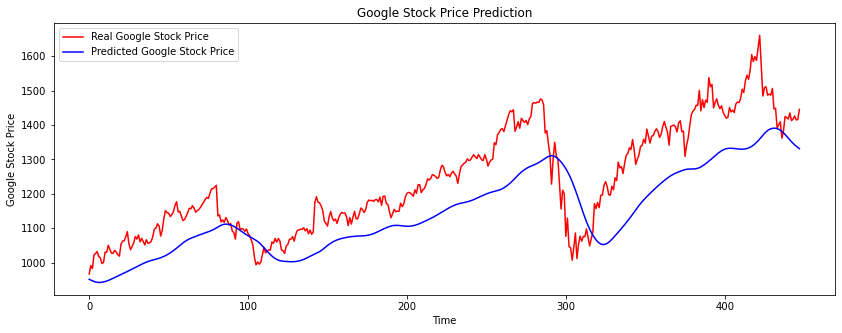

In [40]:
plt.figure(figsize=(14, 5))
plt.plot(y_test, color = "red", label = "Real Google Stock Price")
plt.plot(y_pred, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()